# Task 09 - Support Vector Machines (SVM) for Non-linear Classification
## Pattern Recognition and Machine Learning

In [134]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from svm import *
import numpy as np
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1: Kernel SVM
## Test on trivial data

In [2]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

### get_kernel function

In [95]:
K = get_kernel(X, X[:, :-1], {'kernel': 'linear'})
print(K)
print(K.shape)

[[ 2  3  3 -2 -3]
 [ 3  5  4 -3 -4]
 [ 3  4  5 -3 -5]
 [-2 -3 -3  2  3]
 [-3 -4 -5  3  5]
 [-3 -5 -4  3  4]]
(6, 5)


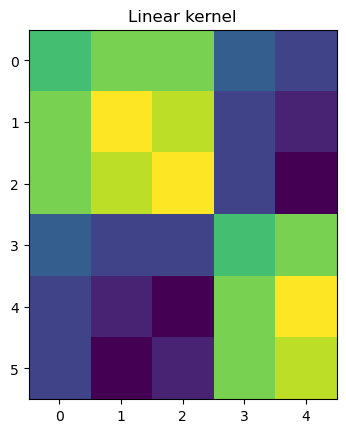

In [96]:
plt.imshow(K, cmap='viridis')
plt.title('Linear kernel');

In [131]:
K = get_kernel(X[:, :], X[:, :], {'kernel': 'polynomial', 'd': 2})
print(K)

[[ 9. 16. 16.  1.  4.  4.]
 [16. 36. 25.  4.  9. 16.]
 [16. 25. 36.  4. 16.  9.]
 [ 1.  4.  4.  9. 16. 16.]
 [ 4.  9. 16. 16. 36. 25.]
 [ 4. 16.  9. 16. 25. 36.]]


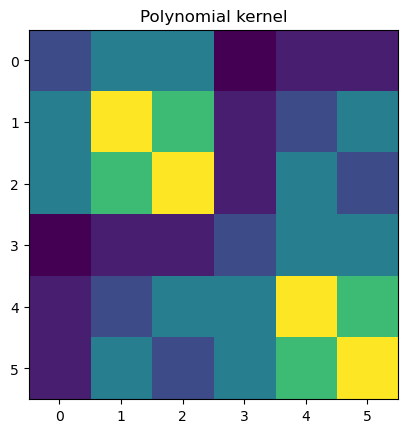

In [132]:
plt.imshow(K, cmap='viridis')
plt.title('Polynomial kernel');

In [11]:
# print(X[:, :-1])
# X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
X1 = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])

K = get_kernel(X[:, :], X[:, :], {'kernel': 'rbf', 'sigma': 1.0})
np.set_printoptions(precision=4, suppress=True)
print(K)
print(K.shape)
np.set_printoptions()

(6, 6)
[[1.     0.6065 0.6065 0.0183 0.0015 0.0015]
 [0.6065 1.     0.3679 0.0015 0.0001 0.    ]
 [0.6065 0.3679 1.     0.0015 0.     0.0001]
 [0.0183 0.0015 0.0015 1.     0.6065 0.6065]
 [0.0015 0.0001 0.     0.6065 1.     0.3679]
 [0.0015 0.     0.0001 0.6065 0.3679 1.    ]]
(6, 6)


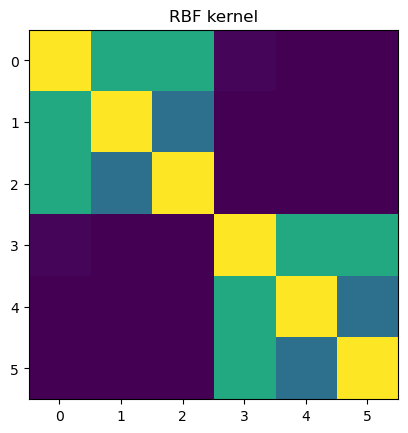

In [4]:
plt.imshow(K, cmap='viridis')
plt.title('RBF kernel');

### The SVM function

In [106]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([-1, 1, 1, 1, -1, -1])
C = float('inf');
options = {'verb': True, 
           't_max': float('inf'),
           'kernel': 'rbf',
           'sigma': 0.02}

In [107]:
model = svm(X, y, C, options)
print(model)
print(type(model['alpha']))
print(model['alpha'].size)

t=1, KKTviol=2.000000, tau=1.000000, tau_lb=0.000000, tau_ub=inf, Q_P=-1.000000
t=2, KKTviol=2.000000, tau=1.000000, tau_lb=0.000000, tau_ub=inf, Q_P=-2.000000
t=3, KKTviol=2.000000, tau=1.000000, tau_lb=0.000000, tau_ub=inf, Q_P=-3.000000
(array([1., 1., 1., 1., 1., 1.]), -3.0, 3, True)
{'sv': array([[ 1,  2,  1, -1, -1, -2],
       [ 1,  1,  2, -1, -2, -1]]), 'y': array([-1,  1,  1,  1, -1, -1]), 'alpha': array([1., 1., 1., 1., 1., 1.]), 'options': {'verb': True, 't_max': inf, 'kernel': 'rbf', 'sigma': 0.02}, 'b': 0.0, 'fun': <function classif_svm at 0x7f56d8299510>}
<class 'numpy.ndarray'>
6


In [108]:
aa = np.array([[1, 2]])
print(aa.reshape(2, 1))
bb = np.array([[3, 4]])


get_kernel(aa.reshape(2, 1), bb.reshape(2, 1), model['options'])

[[1]
 [2]]


array([[0.]])

In [109]:
classif = classif_svm(X, model)
print(classif)

[-1.  1.  1.  1. -1. -1.]


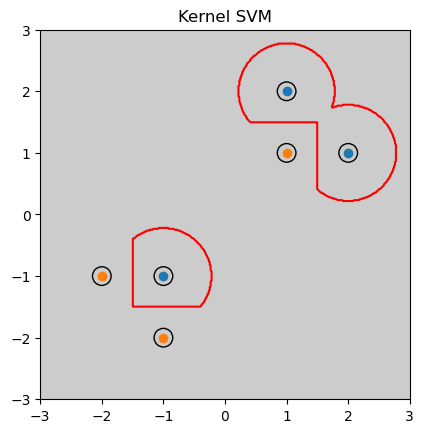

In [110]:
plt.gca().set_aspect("equal")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plot_boundary(plt.gca(), model)
plot_points(X, y)
plt.title('Kernel SVM')
plt.savefig('kernel_svm.png', dpi=300)

## Soft-margin hyperparameter C

(array([0.25, 0.  , 0.  , 0.25, 0.  , 0.  ]), -0.25, 1, True)


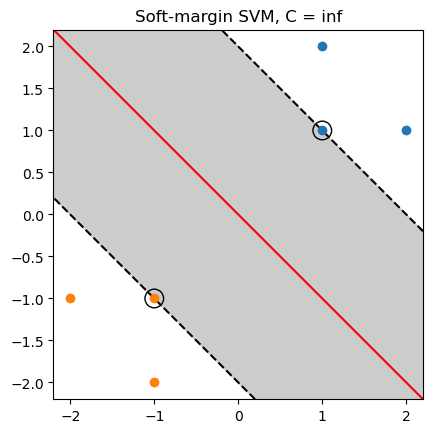

In [111]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([1, 1, 1, -1, -1, -1])
C = np.inf
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'linear'}
 
model = svm(X, y, C, options)
plot_points(X, y)
plot_boundary(plt.gca(), model)
plt.gca().set_aspect("equal")
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.savefig('example_linear_svm_zero_error.png', dpi=600)

In [112]:
data = np.load("data_svm1.npz", allow_pickle=True)
X_toy = data["X"]
y_toy = data["y"]

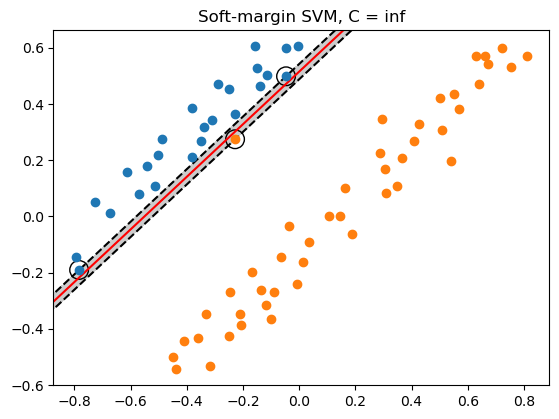

In [114]:
C = np.inf
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'linear'}
model = svm(X_toy, y_toy, C, options=options)
plot_points(X_toy, y_toy)
plot_boundary(plt.gca(), model)
plt.gca().set_aspect("equal")
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.savefig('linear_svm_zero_error.png', dpi=600)

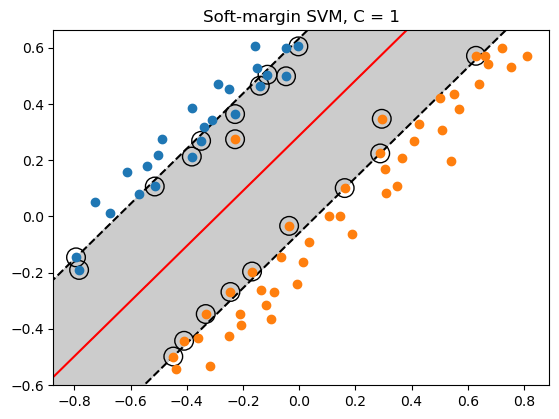

In [115]:
C = 1
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'linear'}
model = svm(X_toy, y_toy, C, options=options)
plot_points(X_toy, y_toy)
plot_boundary(plt.gca(), model)
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.gca().set_aspect("equal")
plt.savefig('linear_svm.png', dpi=600)

### Interactive C demo

In [116]:
try:
    from ipywidgets import interact, interactive, fixed
    
    @interact(C=(0.001,100.,0.001))
    def soft_margin(C=1):
        model = svm(X_toy, y_toy, C, options={'verb': False,
                                              't_max': float('inf'),
                                              'kernel': 'linear'})
        plt.gca().set_aspect("equal")
        plot_points(X_toy, y_toy)
        plot_boundary(plt.gca(), model)
        plt.title('Soft-margin SVM, C = {}'.format(C));
        
except ImportError:
    print('Optional feature.')

Optional feature.


## Comparing different kernels - test on flower data

In [117]:
data = np.load("flower.npz", allow_pickle=True)
X = data["X"]
y = data["y"]

### RBF

In [118]:
C = 10
sigma = 0.1
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'rbf', 
           'sigma': sigma}
 
model = svm(X, y, C, options)
model['b']
#print(model)

-0.921012819843489

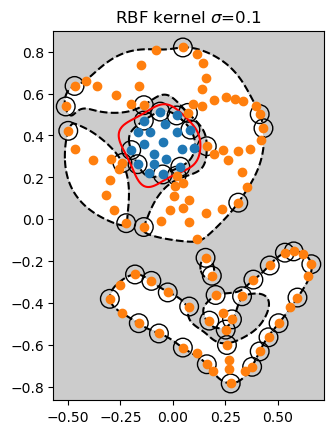

In [119]:
plot_points(X, y)
plt.title('RBF kernel $\sigma$={}'.format(sigma))
plt.gca().set_aspect("equal")
plot_boundary(plt.gca(), model)
plt.savefig('flower_rbf.png', dpi=300)

### Polynomial

In [120]:
C = 10000
d = 4
options = {'verb': False, 
           't_max': float('inf'), 
           'kernel': 'polynomial', 
           'd': d}
 
model = svm(X, y, C, options)

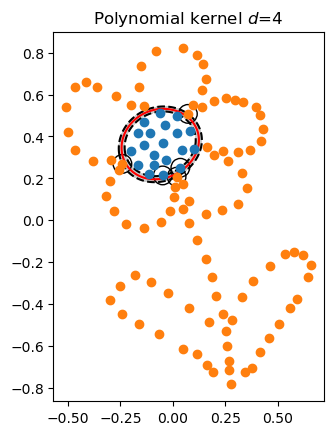

In [121]:
plot_points(X, y)
plt.gca().set_aspect("equal")
plt.title('Polynomial kernel $d$={}'.format(d))
plot_boundary(plt.gca(), model)
plt.savefig('flower_polynomial.png', dpi=300)

# Part 2: Model selection

In [148]:
I = np.array([[1, 2], [3, 4]])
print(I)

I = I.reshape(2, 2, 1)
print(I)
print(I[:, :, 0])

print(compute_measurement_ul_cont(I))


b = np.array([1, 2, 3, 4, 5])
c = np.array([4, 5, 6, 7])
print(np.average(b))
print(np.mean(b))
print(np.std(b))

print(np.intersect1d(b, c))

[[1 2]
 [3 4]]
[[[1]
  [2]]

 [[3]
  [4]]]
[[1 2]
 [3 4]]
[-4.]
3.0
3.0
1.4142135623730951


In [160]:
data = np.load("data_svm1_images.npz", allow_pickle=True)
trn_data = data["trn"].item()
tst_data = data["tst"].item()

X_trn, y_trn, norm_trn = compute_measurements_2d(trn_data)
# X_tst, y_tst, _ = compute_measurements_2d(tst_data, norm_trn)

In [181]:
np.random.seed(42)
trn_folds, tst_folds = crossval(y_trn.size, num_folds=4)
Cs = [0.001, 0.1, 1, 10]
ds = [1, 3, 5]

best_params = None
best_err = np.inf

C = Cs[0]
options = {'verb': False, 't_max': 100000,
            'kernel': 'polynomial', 'd': d}
err = svm_crossvalidation(trn_folds, tst_folds, X_trn, y_trn, C, options)

# for C in Cs:
#     for d in ds:
#         options = {'verb': False, 't_max': 100000,
#                   'kernel': 'polynomial', 'd': d}
#         err = svm_crossvalidation(trn_folds, tst_folds, X_trn, y_trn, C, options)

#         if err < best_err:
#             best_err = err
#             best_params = (C, d)
#         print('C {}, d {} -> err {}'.format(C, d, err))

# print('best params: C={}, d={}'.format(best_params[0], best_params[1]))

4
4
(2, 1800)
[ 584  163  679 ...  860 1459 1126]
(2, 1350)
1350
450


In [ ]:
C = best_params[0]
d = best_params[1]

options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'polynomial', 
           'd': d}
model = svm(X_trn, y_trn, C, options)

In [ ]:
plot_points(X_trn, y_trn, size=2)
plt.gca().set_aspect("equal")
plt.grid(linestyle='--')
plt.title('Polynomial kernel $d$={} TRN data'.format(d))
plot_boundary(plt.gca(), model, plot_support_vectors=False)
plt.savefig('ocr_polynomial_kernel_trn.png', dpi=300)

In [ ]:
classif = classif_svm(X_tst, model)
err = np.mean(classif != y_tst)
print(err)

In [ ]:
plt.gca().set_aspect("equal")
plot_points(X_tst, y_tst, size=5)
plt.gca().relim()
plt.grid(linestyle='--')
plt.title('Polynomial kernel $d$={} TST data'.format(d))
plot_boundary(plt.gca(), model, plot_support_vectors=False)
plt.savefig('ocr_polynomial_kernel_tst.png')

In [ ]:
labels = classif.copy()
labels[labels == 1] = 0
labels[labels == -1] = 1

plt.figure(figsize=(15,10))
show_classification(tst_data['images'], labels, 'AC')
plt.savefig('ocr_svm_classif.png', dpi=300)

# Part 3: Real world example - digit classification

In [ ]:
data = np.load("mnist_trn.npz", allow_pickle=True)
X_trn = data['X']
y_trn = data['y']

In [ ]:
np.random.seed(42)
trn_folds, tst_folds = crossval(y_trn.size, num_folds=5)
sigmas = [0.1, 1, 10, 20, 100, 1000]
Cs = [0.01, 0.1, 1, 10]

best_params = None
best_err = np.inf
for C in Cs:
    for sigma in sigmas:
        options = {'verb': False, 't_max': float('inf'),
                   'kernel': 'rbf', 'sigma': sigma}
        err = svm_crossvalidation(trn_folds, tst_folds, X_trn, y_trn, C, options)

        if err < best_err:
            best_err = err
            best_params = (C, sigma)
        print('C {}, sigma {} -> err {}'.format(C, sigma, err))

print('best params: C={}, sigma={}'.format(best_params[0], best_params[1]))

In [ ]:
C = best_params[0]
sigma = best_params[1]

options = {'verb': False, 't_max': float('inf'),
           'kernel': 'rbf', 'sigma': sigma}
model = svm(X_trn, y_trn, C, options)

In [ ]:
data = np.load("mnist_tst.npz", allow_pickle=True)
X_tst = data['X']
y_tst = data['y']

In [ ]:
classif = None
err = None
print(np.round(err, 8))

In [ ]:
plt.figure(figsize=(15,10))
show_classification(X_tst.reshape(28,28,-1), classif > 0, '01')
plt.savefig('mnist_tst_classif.png', dpi=300)